# 深層学習/Section4:勾配降下法
## 100文字以上の要点まとめ
・勾配降下法：ニューラルネットワークを学習し、パラメータを最適化する手法。  

$$
W^{(t+1)} = W^{t} - \varepsilon \nabla E
$$

$$\nabla E = \frac{\partial E}{\partial W} = \bigl[\frac{\partial E}{\partial w_1} \cdots \frac{\partial E}{\partial w_M} \bigl]$$

$\varepsilon$:学習率  

・ある重みのときの誤差があり、重みを調整して、誤差が最小になるような重みやバイアスをみつける。  
・学習率が大きすぎると、最小値にたどり着かずに収束せず、発散してしまう。逆に小さすぎると、収束するまでに時間がかかる。また、局所最小から抜け出すことができない。  
・代表的な最適化アルゴリズムとして、Adam、Momentum、Adagrad等がある。非常によく使用されるのはAdamである。  
・確率勾配降下法（SGD）は、ランダムに抽出したサンプルの誤差を用いる。  
・ミニバッチ勾配降下法は、ランダムに分割したデータの集まり（ミニバッチ）に属するサンプルの平均誤差を用いる。SGDのメリットを損なわず、計算資源を有効活用できる。 

実装演習

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

##### 結果表示 #####


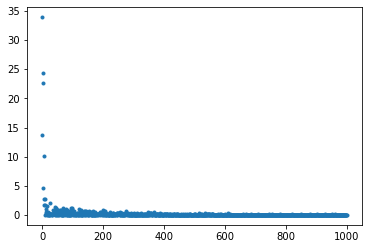

In [22]:
# サンプルとする関数
#yの値を予想するAI
# ReLU関数
def relu(x):
    return np.maximum(0, x)

# 平均二乗誤差
def mean_squared_error(d, y):
    return np.mean(np.square(d - y)) / 2


# 平均二乗誤差の導関数
def d_mean_squared_error(d, y):
    if type(d) == np.ndarray:
        batch_size = d.shape[0]
        dx = (y - d)/batch_size
    else:
        dx = y - d
    return dx

# シグモイド関数（ロジスティック関数）
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# シグモイド関数（ロジスティック関数）の導関数
def d_sigmoid(x):
    dx = (1.0 - sigmoid(x)) * sigmoid(x)
    return dx

def f(x):
    y = 3 * x[0] + 2 * x[1]
    return y

# 初期設定
def init_network():
    # print("##### ネットワークの初期化 #####")
    network = {}
    nodesNum = 10
    network['W1'] = np.random.randn(2, nodesNum)
    network['W2'] = np.random.randn(nodesNum)
    network['b1'] = np.random.randn(nodesNum)
    network['b2'] = np.random.randn()

    # print_vec("重み1", network['W1'])
    # print_vec("重み2", network['W2'])
    # print_vec("バイアス1", network['b1'])
    # print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    # print("##### 順伝播開始 #####")
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    u1 = np.dot(x, W1) + b1
    z1 = relu(u1)
    
    ## 試してみよう
    #z1 = sigmoid(u1)
    
    u2 = np.dot(z1, W2) + b2
    y = u2

    # print_vec("総入力1", u1)
    # print_vec("中間層出力1", z1)
    # print_vec("総入力2", u2)
    # print_vec("出力1", y)
    # print("出力合計: " + str(np.sum(y)))    
    
    return z1, y

# 誤差逆伝播
def backward(x, d, z1, y):
    # print("\n##### 誤差逆伝播開始 #####")    

    grad = {}
    
    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']

    # 出力層でのデルタ
    delta2 = d_mean_squared_error(d, y)
    # b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    # W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    # 中間層でのデルタ
    #delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)

    ## 試してみよう
    delta1 = np.dot(delta2, W2.T) * d_sigmoid(z1)

    delta1 = delta1[np.newaxis, :]
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    x = x[np.newaxis, :]
    # W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
    
    #print_vec("偏微分_重み1", grad["W1"])
    #print_vec("偏微分_重み2", grad["W2"])
    #print_vec("偏微分_バイアス1", grad["b1"])
    #print_vec("偏微分_バイアス2", grad["b2"])

    return grad

# サンプルデータを作成
data_sets_size = 100000
data_sets = [0 for i in range(data_sets_size)]

for i in range(data_sets_size):
    data_sets[i] = {}
    # ランダムな値を設定
    data_sets[i]['x'] = np.random.rand(2)
    
    ## 試してみよう_入力値の設定
    #data_sets[i]['x'] = np.random.rand(2) * 10 -5 # -5〜5のランダム数値
    
    # 目標出力を設定
    data_sets[i]['d'] = f(data_sets[i]['x'])
    
losses = []
# 学習率
learning_rate = 0.01

# 抽出数
epoch = 1000

# パラメータの初期化
network = init_network()
# データのランダム抽出
random_datasets = np.random.choice(data_sets, epoch)

# 勾配降下の繰り返し
for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]

    # 誤差
    loss = mean_squared_error(d, y)
    losses.append(loss)

print("##### 結果表示 #####")    
lists = range(epoch)


plt.plot(lists, losses, '.')
# グラフの表示
plt.show()

オンライン学習とは2行で。

### オンライン学習とは、学習データが入ってくる度にその都度パラメータ（重みやバイアス）を更新しながら、学習を進めていく手法である。逐次取得したデータを1つずつ使っていく特徴がある。


数式の意味を図に書く

$$
W^{(t+1)} = W^{t} - \varepsilon \nabla E
$$

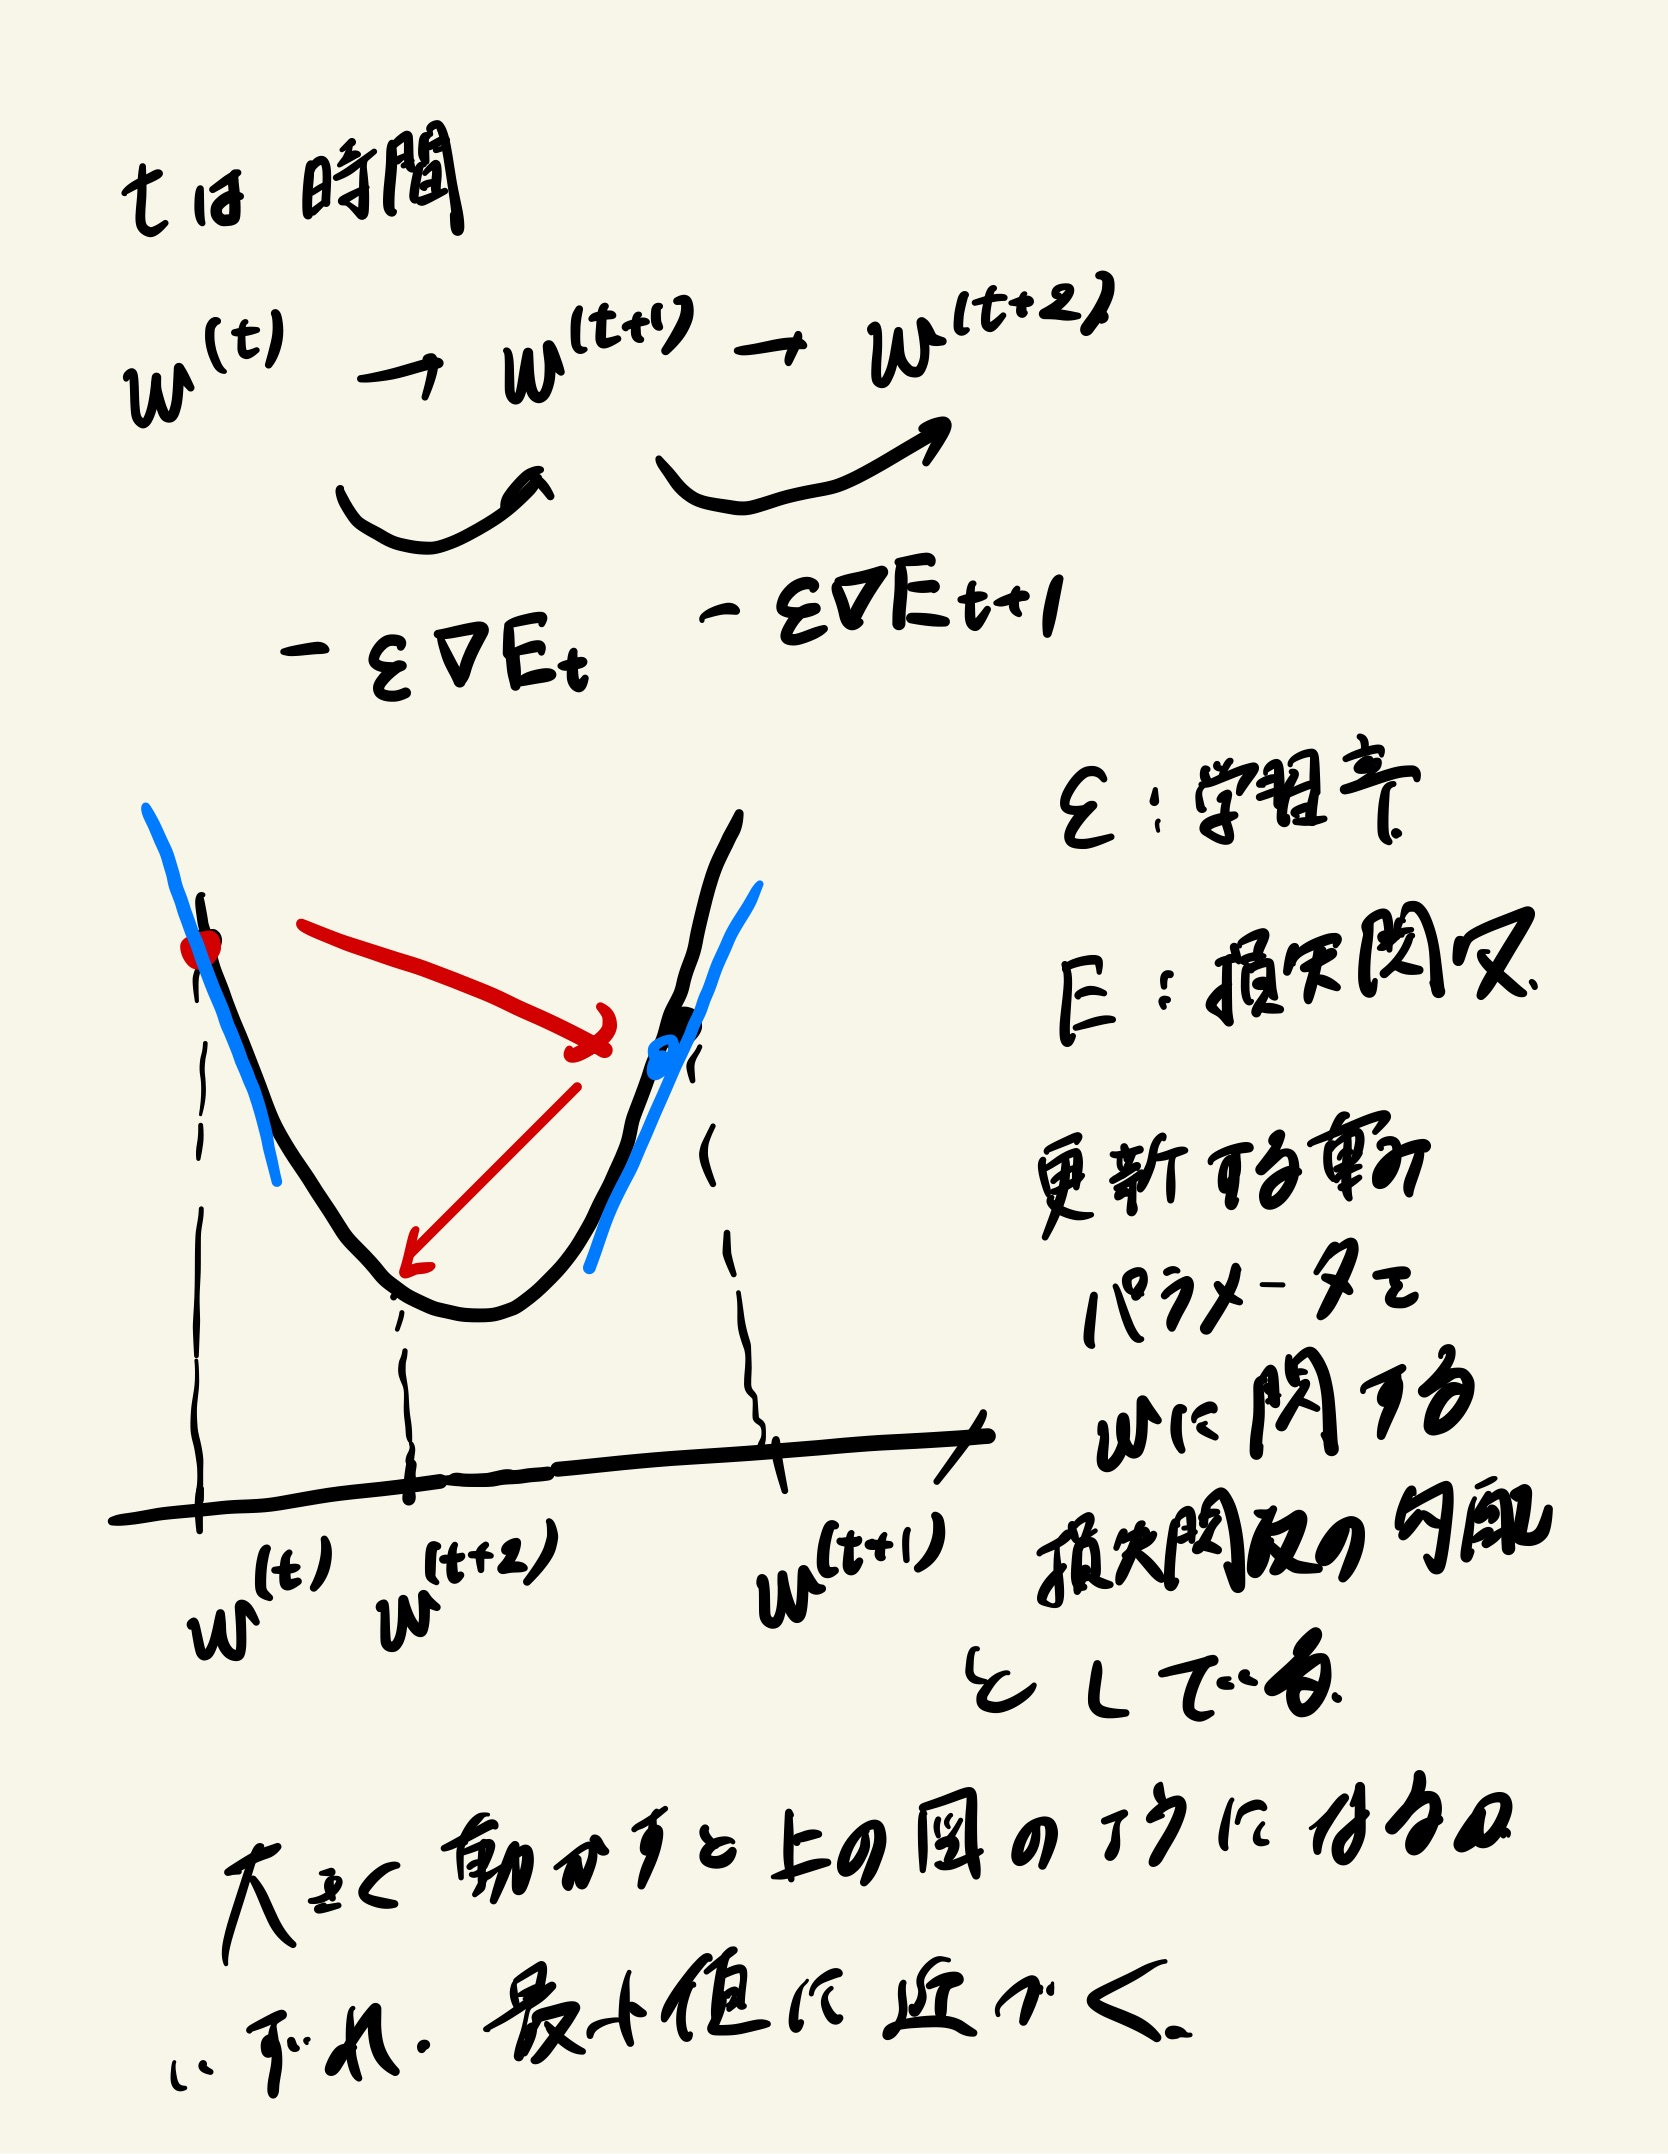